In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
wine = datasets.load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
#数据集分割
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

#决策树模型
clf = DecisionTreeClassifier(random_state=0,criterion="entropy")

#随机森林模型
rfc = RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=3,max_features=0.9)

#模型训练
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtest,Ytest)

#测试集上的预测准确率
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print('Single Tree:%s,Random Forest:%s'%(round(score_c,3),round(score_r,3)))

Single Tree:0.889,Random Forest:0.981


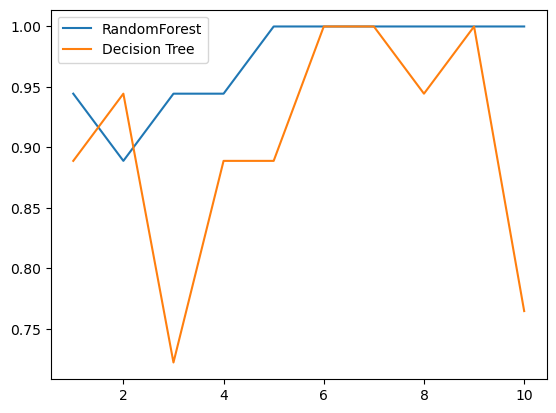

In [6]:
#画出随机森林和决策树在一组交叉验证下的效果对比
rfc = RandomForestClassifier(n_estimators=20,criterion="entropy")
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier(criterion="entropy")
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")

plt.legend()
plt.show()

最大的准确率为：0.989,对应的n_estimators=12


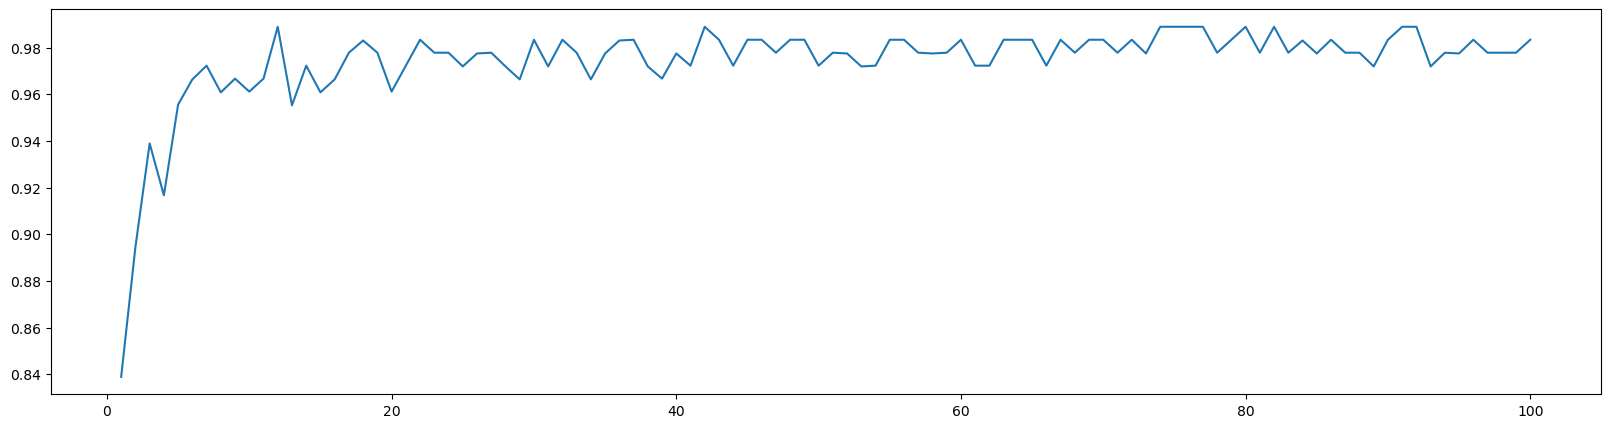

In [7]:
#n_estimators的学习曲线
superpa = []
for i in range(100):
    #这里就是进行了100次的随机森林算法，每次的n_estimators设置不一样
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=1,criterion="entropy")
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)

print("最大的准确率为：%s,对应的n_estimators=%s"%(round(max(superpa),3),superpa.index(max(superpa))+1))
plt.figure(figsize=[20,5])
plt.plot(range(1,101),superpa)
plt.show()

In [8]:
#创建随机森林分类器
rfc = RandomForestClassifier(n_estimators=29,criterion="entropy")

#模型训练
rfc = rfc.fit(Xtrain,Ytrain)

#预测
rfc.score(Xtest,Ytest)

#得出所有特征的重要性数值
rfc.feature_importances_

array([0.13560849, 0.04573904, 0.01871014, 0.01814513, 0.03032402,
       0.06281086, 0.108787  , 0.01362929, 0.01205152, 0.17146962,
       0.11507611, 0.11532034, 0.15232844])

In [9]:
#返回测试集每个样本在所在数的叶子节点的索引
rfc.apply(Xtest)

array([[ 5, 16,  8, ...,  1, 14,  4],
       [ 2, 10,  8, ...,  1,  4,  4],
       [ 7,  2,  2, ...,  5,  9,  9],
       ...,
       [20, 13, 15, ..., 10,  9,  9],
       [ 7,  2,  2, ...,  5,  9,  9],
       [11, 16, 15, ..., 16, 14, 17]], dtype=int64)

In [10]:
#预测结果
rfc.predict(Xtest)

array([2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0,
       0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0])

In [11]:
#每一个样本在不同的类别上的概率
rfc.predict_proba(Xtest)

array([[0.31034483, 0.17241379, 0.51724138],
       [0.06896552, 0.17241379, 0.75862069],
       [0.        , 1.        , 0.        ],
       [0.        , 0.06896552, 0.93103448],
       [0.10344828, 0.68965517, 0.20689655],
       [0.89655172, 0.10344828, 0.        ],
       [0.03448276, 0.24137931, 0.72413793],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.31034483, 0.65517241, 0.03448276],
       [0.        , 1.        , 0.        ],
       [0.03448276, 0.24137931, 0.72413793],
       [0.06896552, 0.79310345, 0.13793103],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.10344828, 0.89655172],
       [0.03448276, 0.86206897, 0.10344828],
       [0.        , 0.20689655, 0.79310345],
       [0.93103448, 0.06896552, 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.96551724, 0.03448276, 0.        ],
       [1.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier(criterion="entropy")

#确认网格交叉验证的参数
param_dict = {"n_estimators":[10,20,30,50],
              "max_depth":[2,3,5,10]}

estimator = GridSearchCV(estimator,param_grid=param_dict,cv=3)
estimator.fit(Xtrain,Ytrain)

#预测
y_predict = estimator.predict(Xtest)

#模型评估
score = estimator.score(Xtest,Ytest)
print("随机森林算法准确率：\n",score)

print("最佳参数:\n",estimator.best_params_)

print("最佳结果：\n",estimator.best_score_)

print("最佳估计器:\n",estimator.best_estimator_)

print("最佳预估器:\n",estimator.cv_results_)

随机森林算法准确率：
 0.9444444444444444
最佳参数:
 {'max_depth': 5, 'n_estimators': 10}
最佳结果：
 0.967673248161053
最佳估计器:
 RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)
最佳预估器:
 {'mean_fit_time': array([0.00899879, 0.01533286, 0.02117236, 0.03550649, 0.00800045,
       0.01466791, 0.02097472, 0.03533324, 0.00766691, 0.01466624,
       0.02183485, 0.03587349, 0.00733423, 0.01465265, 0.02169275,
       0.03533244]), 'std_fit_time': array([1.41450484e-03, 4.70415035e-04, 2.44226938e-04, 1.86611501e-03,
       9.60274217e-07, 4.71652146e-04, 7.86858717e-04, 4.71651584e-04,
       4.71595298e-04, 4.71820282e-04, 2.28286007e-04, 3.22456719e-04,
       4.71707890e-04, 4.93904878e-04, 4.66699644e-04, 4.69348314e-04]), 'mean_score_time': array([0.00100017, 0.0016667 , 0.00233348, 0.00366592, 0.00099945,
       0.00133252, 0.00200001, 0.00300002, 0.00099961, 0.00133332,
       0.00200272, 0.00299994, 0.00099881, 0.00133284, 0.00199954,
       0.00300288]), 'std_score_time': array([6.